# Komesh Yadav

# Data science and Business Analytics task intern

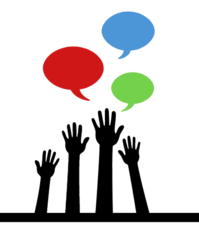

![](https://wallpapercave.com/wp/wp4059913.jpg)

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the input File deliveries

In [3]:
df=pd.read_csv(r'/Users/abc/Desktop/intern/Indian Premier League/deliveries.csv',encoding='latin1')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Reading the input File matches

In [4]:
df2=pd.read_csv(r'/Users/abc/Desktop/intern/Indian Premier League/matches.csv')
df2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# basic data cleaning

There have been multiple names for the Same Team.

In [5]:
df2.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
df2.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
df2.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
df2.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

# Statistical information

![](https://www.thoughtco.com/thmb/7aiSTZL8hgfspUpNGKw_m_ggaZY=/2958x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/bar-chart-build-of-multi-colored-rods-114996128-5a787c8743a1030037e79879.jpg)

In [6]:
df2.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


# Checking duplicate values

In [7]:
df2.duplicated().any()

False

In [8]:
df.duplicated().any()

True

# checking null values

In [9]:
df2.isnull().sum().sort_values(ascending=False)

umpire3            637
city                 7
winner               4
player_of_match      4
umpire2              2
umpire1              2
venue                0
win_by_wickets       0
win_by_runs          0
id                   0
season               0
result               0
toss_decision        0
toss_winner          0
team2                0
team1                0
date                 0
dl_applied           0
dtype: int64

# Top 10 Cities where the most number of matches have been played.

![](https://cdn.britannica.com/26/84526-050-45452C37/Gateway-monument-India-entrance-Mumbai-Harbour-coast.jpg)

Top 10 Cities with the maximum number of Matches Played:
          city  No. of Matches
0      Mumbai             101
1     Kolkata              77
2       Delhi              74
3   Bangalore              66
4   Hyderabad              64
5     Chennai              57
6      Jaipur              47
7  Chandigarh              46
8        Pune              38
9      Durban              15


Text(0.5, 1.0, '##Top Cities that have hosted IPL Matches##')

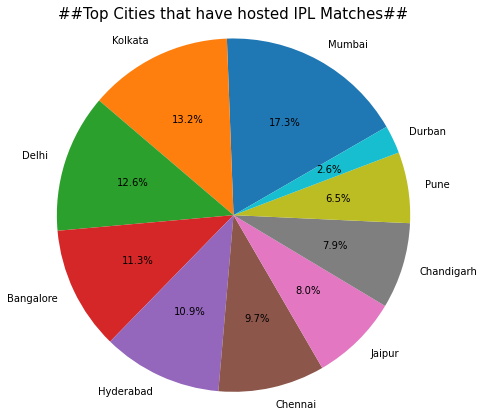

In [10]:
city_counts=df2.groupby('city').apply(lambda x:x['city'].count()).reset_index(name='No. of Matches')
top_cities_order=city_counts.sort_values(by='No. of Matches',ascending=False,ignore_index=True)
top_cities=top_cities_order[:10]
print('Top 10 Cities with the maximum number of Matches Played:\n',top_cities)
plt.figure(figsize=(7,7))
plt.pie(top_cities['No. of Matches'],labels=top_cities['city'],autopct='%1.1f%%', startangle=30)
plt.axis('equal')
plt.title('##Top Cities that have hosted IPL Matches##',size=15)

# Top 10 venues where the most number of IPL matches have been played

![](https://i.ytimg.com/vi/tWQ9OgYLLmg/maxresdefault.jpg)

Top 10 Stadiums with the maximum number of Matches Played:
                                      venue  Match Counts
0                   M. Chinnaswamy Stadium            80
1                             Eden Gardens            77
2                         Feroz Shah Kotla            74
3                         Wankhede Stadium            73
4       Rajiv Gandhi International Stadium            64
5                 M.A. Chidambaram Stadium            57
6       Punjab Cricket Association Stadium            56
7                   Sawai Mansingh Stadium            47
8  Maharashtra Cricket Association Stadium            21
9               Dr DY Patil Sports Academy            17


Text(0.5, 1.0, 'Top Stadiums that have hosted IPL Matches')

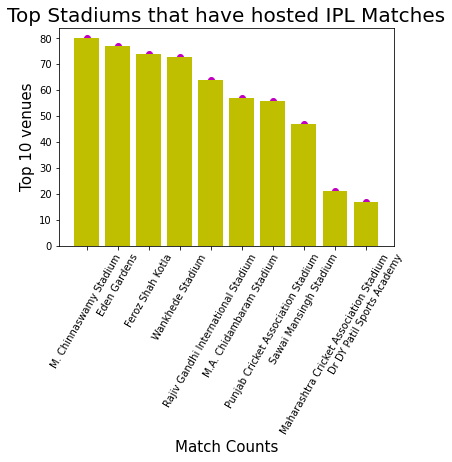

In [11]:
venue_counts=df2.groupby('venue').apply(lambda x:x['venue'].count()).reset_index(name='Match Counts')
top_venues_order=venue_counts.sort_values(by='Match Counts',ascending=False,ignore_index=True)
top_venues=top_venues_order[:10]
print('Top 10 Stadiums with the maximum number of Matches Played:\n',top_venues)
plt.bar(top_venues['venue'],top_venues['Match Counts'],color='y')
plt.scatter(top_venues['venue'],top_venues['Match Counts'],color='m')
plt.xticks(rotation=60)
plt.xlabel('Match Counts',size=15)
plt.ylabel('Top 10 venues',size=15)
plt.title('Top Stadiums that have hosted IPL Matches',size=20)

# Top 10 Scoring Batsman

![](https://images.bhaskarassets.com/web2images/521/2020/03/24/289153_1585031683.jpg)

The Top 10 Batsmen in thr Tournament are:
           batsman  Runs
0         V Kohli  5434
1        SK Raina  5415
2       RG Sharma  4914
3       DA Warner  4741
4        S Dhawan  4632
5        CH Gayle  4560
6        MS Dhoni  4477
7      RV Uthappa  4446
8  AB de Villiers  4428
9       G Gambhir  4223


Text(0.5, 1.0, 'Top 10 Batsmen in IPL- Seasons 2008-2019')

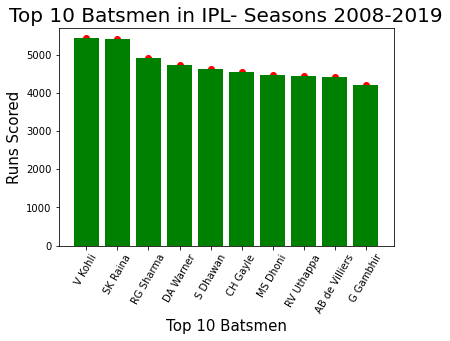

In [12]:
batting_tot=df.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_sorted=batting_tot.sort_values(by='Runs',ascending=False,ignore_index=True)
top_batsmen=batting_sorted[:10] 
print('The Top 10 Batsmen in thr Tournament are:\n',top_batsmen)
plt.bar(top_batsmen['batsman'],top_batsmen['Runs'],color='g')
plt.scatter(top_batsmen['batsman'],top_batsmen['Runs'],color='r')
plt.xticks(rotation=60)
plt.xlabel('Top 10 Batsmen',size=15)
plt.ylabel('Runs Scored',size=15)
plt.title('Top 10 Batsmen in IPL- Seasons 2008-2019',size=20)

# Innings wise batting average of the Teams

![](https://www.hindustantimes.com/rf/image_size_960x540/HT/p2/2020/09/08/Pictures/_b129f4be-f1a2-11ea-8bce-519453830254.jpg)

Text(0.5, 1.0, 'Team wise Batting Average in IPL- Seasons')

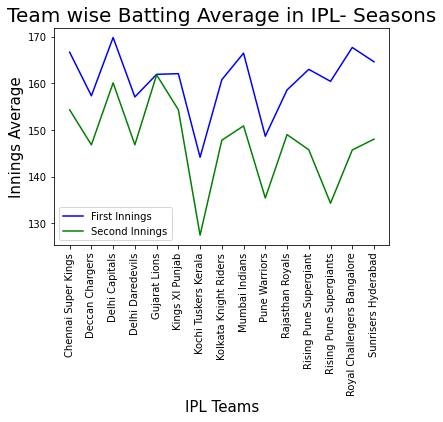

In [13]:
first_innins_score=df[df['inning']==1]
team_innings_score=first_innins_score.groupby(['batting_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_score_avg=team_innings_score.groupby('batting_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_innings_score_avg['batting_team'],team_innings_score_avg['Innings Average'],'b')
second_innins_score=df[df['inning']==2]
team_innings_second_score=second_innins_score.groupby(['batting_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_second_innings_score_avg=team_innings_second_score.groupby('batting_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_second_innings_score_avg['batting_team'],team_second_innings_score_avg['Innings Average'],'g')
plt.xticks(rotation=90)
plt.legend(['First Innings','Second Innings'],prop={'size':10})
plt.xlabel('IPL Teams',size=15)
plt.ylabel('Innings Average',size=15)
plt.title('Team wise Batting Average in IPL- Seasons',size=20)

**Observation**: One distinct observation is that the second innings Batting and Bowling averages are less as compared to the first inning.

# Innings wise bowling average of the Teams

![](https://www.crictracker.com/wp-content/uploads/2018/02/IPL-bowling-records.jpg)

Text(0.5, 1.0, 'Team wise Bowling Average in IPL- Seasons')

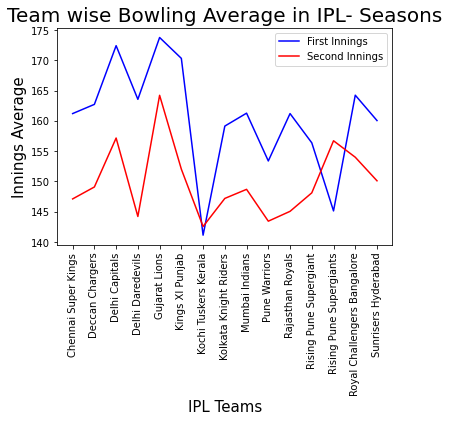

In [14]:
first_innins_score=df[df['inning']==1]
team_innings_score=first_innins_score.groupby(['bowling_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_score_avg=team_innings_score.groupby('bowling_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_innings_score_avg['bowling_team'],team_innings_score_avg['Innings Average'],'b')
second_innins_score=df[df['inning']==2]
team_innings_second_score=second_innins_score.groupby(['bowling_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_second_innings_score_avg=team_innings_second_score.groupby('bowling_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_second_innings_score_avg['bowling_team'],team_second_innings_score_avg['Innings Average'],'r')
plt.xticks(rotation=90)
plt.legend(['First Innings','Second Innings'],prop={'size':10})
plt.xlabel('IPL Teams',size=15)
plt.ylabel('Innings Average',size=15)
plt.title('Team wise Bowling Average in IPL- Seasons',size=20)

# Win by Runs/Win by Wickets- Team wise Average

![](https://images.news18.com/ibnlive/uploads/2018/05/Dhoni_BCCI.jpg)

Text(0.5, 1.0, 'Teams Average winning by Runs/Wickets Summary')

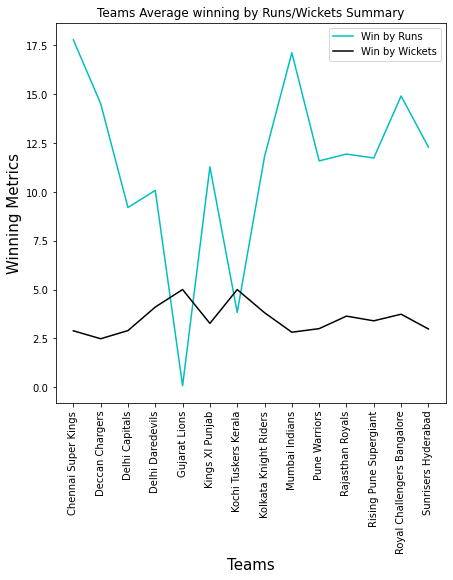

In [15]:
win_runs=df2.groupby('winner').apply(lambda x:np.average(x['win_by_runs'])).reset_index(name='Win By Runs Average')
win_wickets=df2.groupby('winner').apply(lambda x:np.average(x['win_by_wickets'])).reset_index(name='Win By Wickets Average')
plt.figure(figsize=(7,7))
plt.plot(win_runs['winner'],win_runs['Win By Runs Average'],color='c')
plt.plot(win_wickets['winner'],win_wickets['Win By Wickets Average'],color='k')
plt.xlabel('Teams',size=15)
plt.xticks(rotation=90)
plt.ylabel('Winning Metrics',size=15)
plt.legend(['Win by Runs','Win by Wickets'])
plt.title('Teams Average winning by Runs/Wickets Summary')

# Head to Head Match Analysis between the Teams of IPL

Text(23.999999999999986, 0.5, 'Match')

<Figure size 432x288 with 0 Axes>

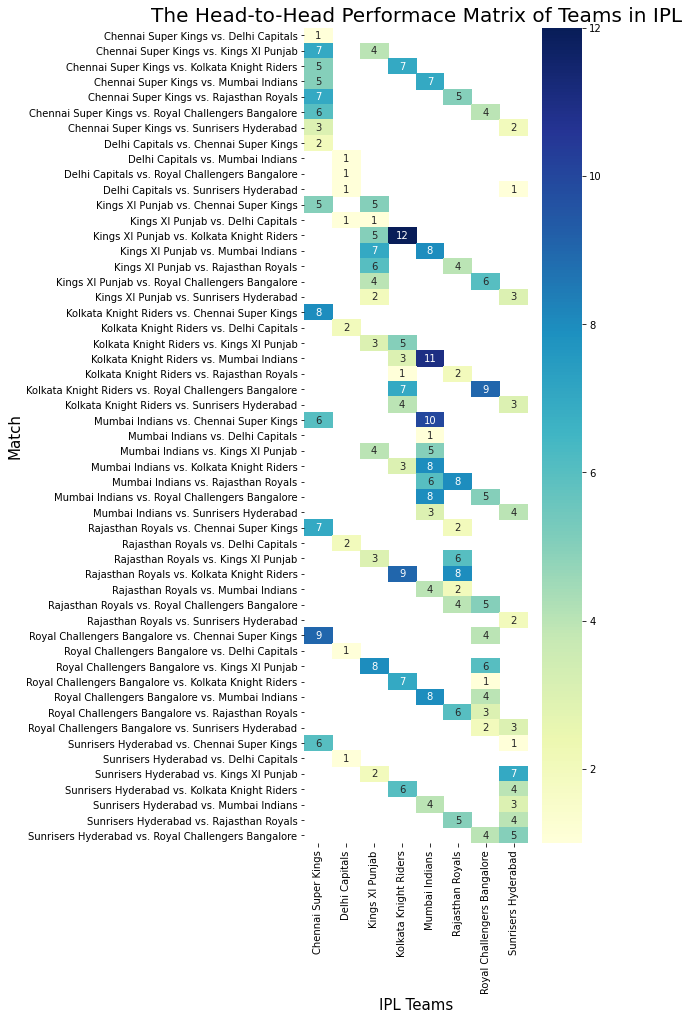

In [16]:
Current_teams=['Chennai Super Kings','Mumbai Indians','Rajasthan Royals','Delhi Capitals','Sunrisers Hyderabad','Kolkata Knight Riders','Royal Challengers Bangalore','Kings XI Punjab']
team_1_filter=df2[df2.team1.isin(Current_teams)]
team_2_filter=team_1_filter[team_1_filter.team2.isin(Current_teams)]
teams_filter=team_2_filter[team_2_filter.winner.isin(Current_teams)]
head_to_head_matches=teams_filter.groupby(['team1','team2','winner']).apply(lambda x:x['winner'].count()).reset_index(name='Winning Counts')
head_to_head_matches['Game']=head_to_head_matches['team1']+' vs. '+head_to_head_matches['team2']
head_to_head_matches.loc[:,['Game','winner','Winning Counts']]
heatmap1_data = pd.pivot_table(head_to_head_matches, values='Winning Counts', 
                     index=['Game'], 
                     columns='winner')
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,15))
g=sns.heatmap(heatmap1_data,annot=True, cmap="YlGnBu",fmt='g')
ax.set_title('The Head-to-Head Performace Matrix of Teams in IPL',size=20)
ax.set_xlabel('IPL Teams',size=15)
ax.set_ylabel('Match',size=15)

# Team wise winning Performance at Venues

# Most Valuable Player

![](https://images.indianexpress.com/2013/04/Gayle-175-759.png)

In [17]:
mvp_ser = df2['player_of_match'].value_counts()

mvp = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>5:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp = mvp.append(temp_df2, ignore_index=True)
        count += 1 
mvp

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,DA Warner,17
3,MS Dhoni,17
4,RG Sharma,17
5,YK Pathan,16


**Observation** : CH Gayle is the player who won the most no. of the match awards and hence he is the most valuable player.

# The most successful IPL team

![](https://i.cdn.newsbytesapp.com/images/l197_9401613468511.jpg)

In [18]:
team_wins_ser = df2['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)

In [19]:
team_wins_df

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiant,15


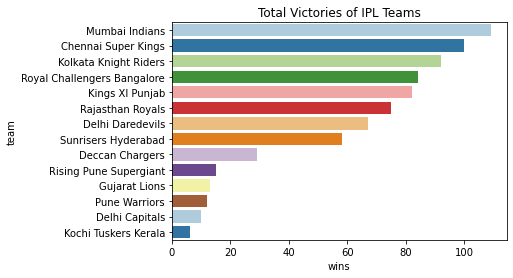

In [20]:
plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=team_wins_df, palette='Paired');

**Observation**:Mumbai Indians is the most successful team(as they have won the maximum number of IPL matches -109) followed by Chennai Super Kings and Kolkata Knight Riders.

Text(0.5, 1.0, 'Team wise wins at the Venues')

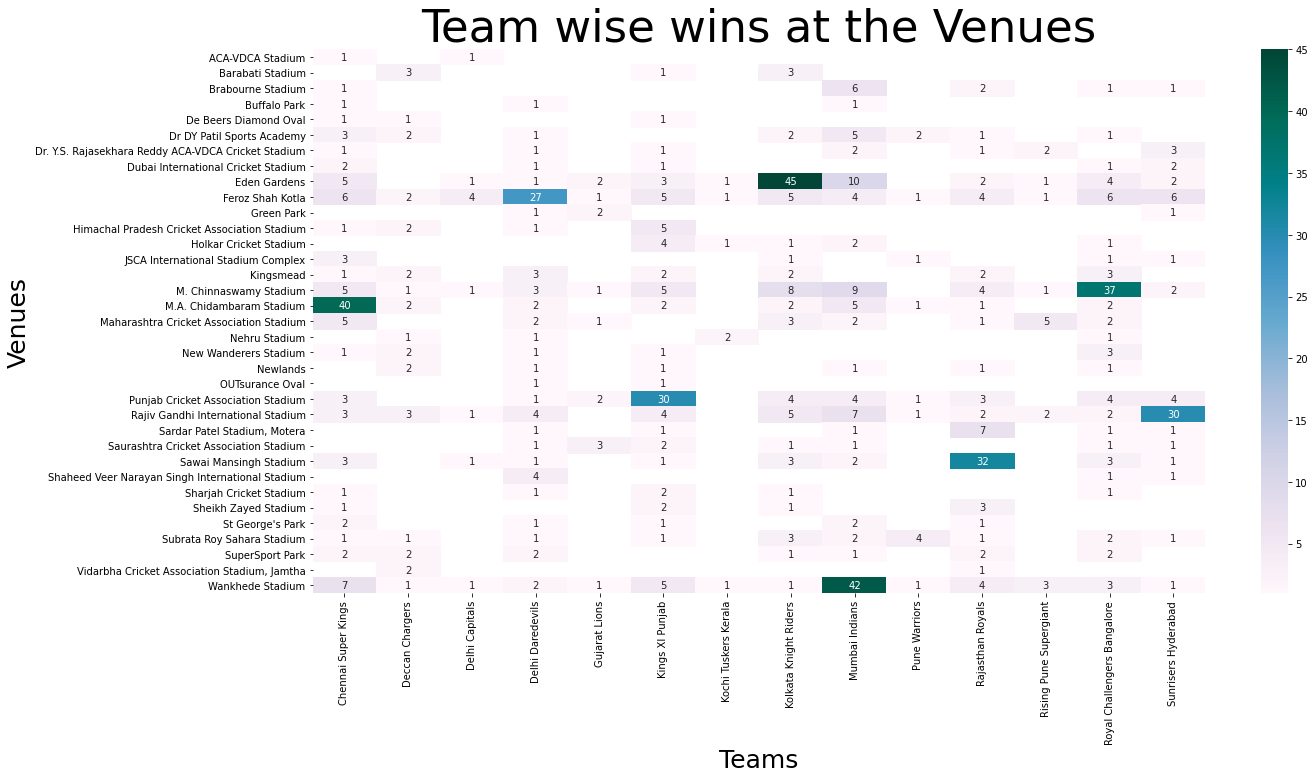

In [21]:
venue_win=df2.groupby(['venue','winner']).apply(lambda x:x['winner'].count()).reset_index(name='Match Wins')
venue_win_pvt=pd.pivot(venue_win,values='Match Wins',index='venue',columns='winner')
venue_win_pvt.replace(np.NaN,0)
plt.figure(figsize=(20,10))
htmp=sns.heatmap(venue_win_pvt,annot=True,fmt='g',cmap='PuBuGn')
plt.xlabel('Teams',size=25)
plt.ylabel('Venues',size=25)
plt.title('Team wise wins at the Venues',size=45)

**Observation** : The blue and green highlights are expected for the particular teams at the venues- For e.g. Chennai Super Kings at M.A. Chidambaram, Kolkata Knight Riders at Eden Gardens and Mumbai Indians at Wankhede Stadium-since the Venues being located at their home stadium, they have played more number of matches in that place

# Analyzing the Impact of Toss choice

![](https://www.mykhel.com/img/2020/08/rohit-sharma-dhoni-ipl-toss-1597552260.jpg)

Text(0.5, 1.0, 'The Toss Decisions taken by Venue Heatmap-in IPL')

<Figure size 432x288 with 0 Axes>

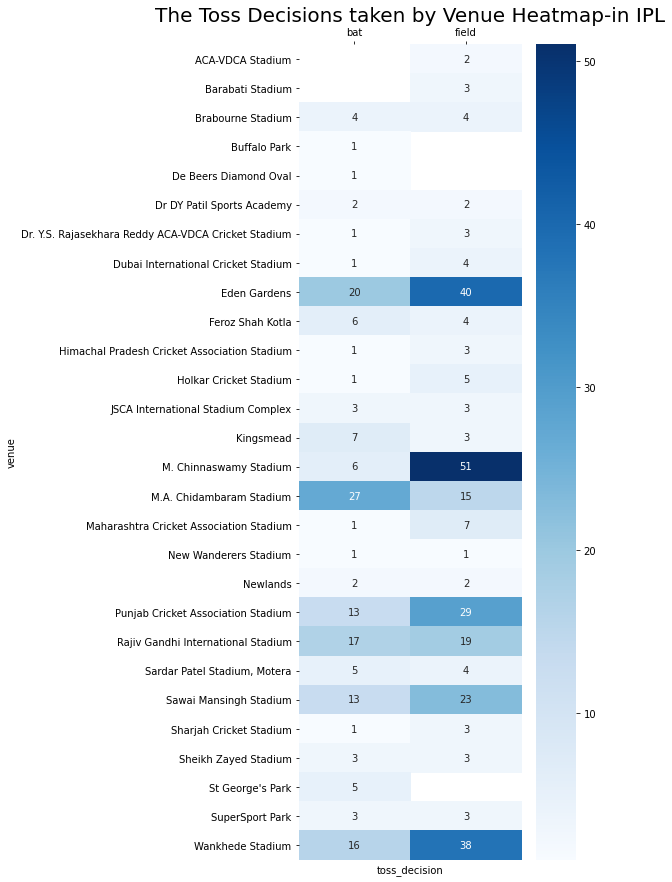

In [22]:
venue_toss=teams_filter.groupby(['venue','toss_decision']).apply(lambda x:x['toss_decision'].count()).reset_index(name='Toss Decision Counts')
heatmap2_data = pd.pivot_table(venue_toss, values='Toss Decision Counts', 
                     index=['venue'], 
                     columns='toss_decision')
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,15))
g=sns.heatmap(heatmap2_data,annot=True, cmap="Blues",fmt='g')
g.xaxis.set_ticks_position("top")
ax.set_title('The Toss Decisions taken by Venue Heatmap-in IPL',size=20)

In [23]:
venue_toss_result=teams_filter.groupby(['venue','toss_decision']).apply(lambda x:np.sum(np.where(x['toss_winner']==x['winner'],1,0))).reset_index(name='Toss Winner Wins Match')
merged_venue_data=pd.merge(venue_toss_result,venue_toss,how='inner',left_on=['venue','toss_decision'],right_on=['venue','toss_decision'])
merged_venue_data['Toss Winner Lose Match']=merged_venue_data['Toss Decision Counts']-merged_venue_data['Toss Winner Wins Match']
merged_data_arranged=merged_venue_data.loc[:,['venue','toss_decision','Toss Decision Counts','Toss Winner Wins Match','Toss Winner Lose Match']]
merged_data_arranged

,venue,toss_decision,Toss Decision Counts,Toss Winner Wins Match,Toss Winner Lose Match
0,ACA-VDCA Stadium,field,2,2,0
1,Barabati Stadium,field,3,2,1
2,Brabourne Stadium,bat,4,2,2
3,Brabourne Stadium,field,4,3,1
4,Buffalo Park,bat,1,1,0
5,De Beers Diamond Oval,bat,1,0,1
6,Dr DY Patil Sports Academy,bat,2,2,0
7,Dr DY Patil Sports Academy,field,2,2,0
8,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,bat,1,0,1
9,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,field,3,1,2


**Observation**: As we can see in the data above, teams that have decided to field first, have won more number of matches in most of the fields. Although this is a completely data viewed analogy, The above represenattaion is not quite pleasing. Hence we have plotted a Heatmap below to understand the impact of Toss- and the decision chosen at each venue.

# The list of the Top 10 highest scorers in a match

![](https://images.inuth.com/2018/04/Most-Runs.jpg)

The Top 10 Batting Performances in the IPL History are:
             batsman  Innings Runs  Balls Faced  Strike Rate for Match  inning  \
0          CH Gayle           175           69             253.623188       1   
69      BB McCullum           158           77             205.194805       1   
146  AB de Villiers           133           61             218.032787       1   
207         RR Pant           130           64             203.125000       1   
271  AB de Villiers           129           53             243.396226       1   
324        CH Gayle           128           62             206.451613       1   
386         M Vijay           127           57             222.807018       1   
443       DA Warner           126           60             210.000000       1   
503        V Sehwag           122           62             196.774194       1   
565       SR Watson           121           60             201.666667       2   
625     PC Valthaty           120           64      

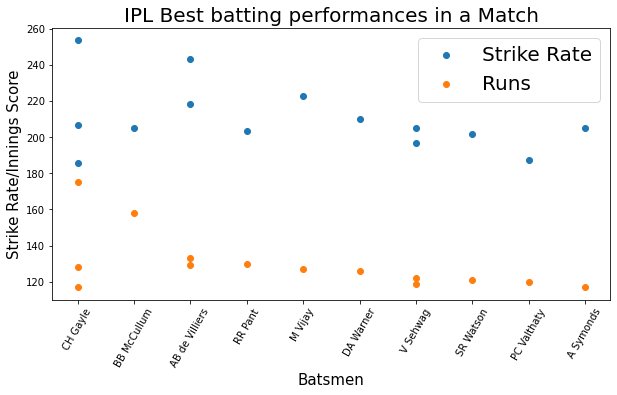

In [24]:
batting_ings=df.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
batting_ings_sorted=batting_ings.sort_values(by='Innings Runs',ascending=False)
top_batsmen_scores=batting_ings_sorted[:14] 
batsman_ball_faced=df.groupby(['match_id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')
batsmen_performance=pd.merge(top_batsmen_scores,batsman_ball_faced,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_performance['Strike Rate for Match']=batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced']
batsmen_innings=pd.merge(batsmen_performance,df,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_innings_req=batsmen_innings.iloc[:,1:8]
batsmen_innings_req_2=batsmen_innings_req.drop_duplicates()
print('The Top 10 Batting Performances in the IPL History are:\n',batsmen_innings_req_2)
x=batsmen_innings_req_2['batsman']
y1=batsmen_innings_req_2['Strike Rate for Match']
y2=batsmen_innings_req_2['Innings Runs']
plt.figure(figsize=(10,5))
plt.scatter(x,y1)
plt.scatter(x,y2)
plt.xlabel('Batsmen',size=15)
plt.ylabel('Strike Rate/Innings Score',size=15)
plt.title('IPL Best batting performances in a Match',size=20)
plt.xticks(rotation=60)
plt.legend(['Strike Rate','Runs'],prop={'size':20})

**Observation** - CH Gayle and AB de Villiers have appeared twice in the Top 10 run scorer list.

# summary of all team

In [25]:
overall_team_stats = pd.DataFrame(
{'Total Matches Played': df2["team1"].value_counts() +     df2["team2"].value_counts(), 
'Toss Won': df2["toss_winner"].value_counts(), 'Total Won': df2["winner"].value_counts(), 
 'Total Lost': ((df2["team1"].value_counts() + df2["team2"].value_counts()) - df2["winner"].value_counts())})
overall_team_stats.sort_values(by="Total Won", ascending=False)

,Total Matches Played,Toss Won,Total Won,Total Lost
Mumbai Indians,187.0,98,109.0,78.0
Chennai Super Kings,164.0,89,100.0,64.0
Kolkata Knight Riders,178.0,92,92.0,86.0
Royal Challengers Bangalore,180.0,81,84.0,96.0
Kings XI Punjab,176.0,81,82.0,94.0
Rajasthan Royals,147.0,80,75.0,72.0
Delhi Daredevils,161.0,80,67.0,94.0
Sunrisers Hyderabad,108.0,46,58.0,50.0
Deccan Chargers,75.0,43,29.0,46.0
Rising Pune Supergiant,30.0,6,15.0,15.0


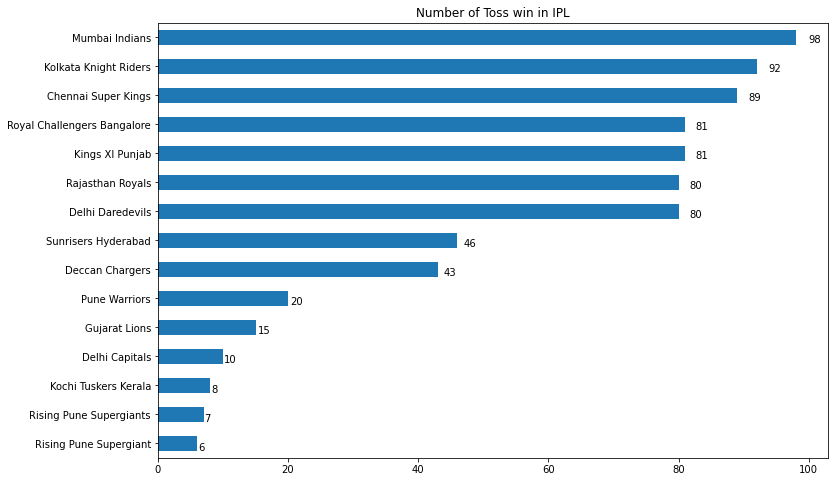

In [26]:
ax = overall_team_stats["Toss Won"].sort_values().plot(kind="barh", title="Number of Toss win in IPL", figsize=(12,8))
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.020, p.get_y() * 1.005))

# The end

![](https://media1.giphy.com/media/RK4Ex4G7yPluVyghS1/200w.webp?cid=ecf05e4718amdxan87bpyqniwsfxvswyhp0949pvrttfvlz1&rid=200w.webp)